In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import tensorflow.keras as tk

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

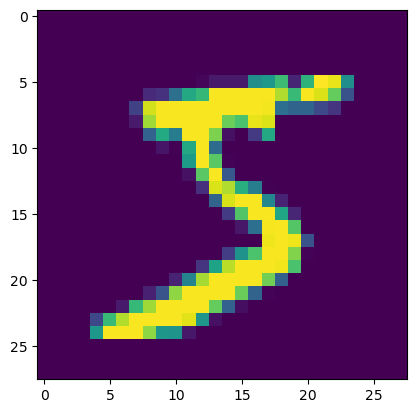

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

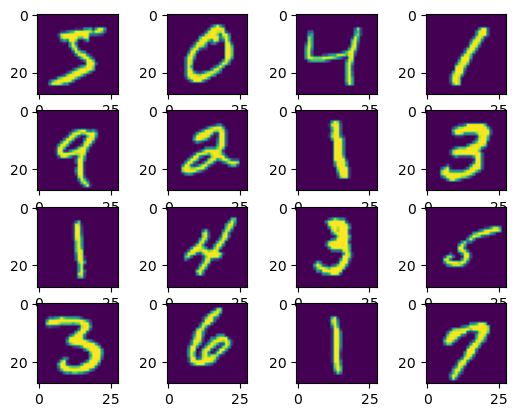

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [9]:
input_shape = (28, 28, 1)

In [10]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [11]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


C:\Users\Иван\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 823us/step - loss: 5.3095e-07 - accuracy: 0.1242
Epoch 2/5
1875/1875 [==============================] - 2s 807us/step - loss: 5.3095e-07 - accuracy: 0.1242
Epoch 3/5
1875/1875 [==============================] - 2s 809us/step - loss: 5.3095e-07 - accuracy: 0.1242
Epoch 4/5
1875/1875 [==============================] - 1s 787us/step - loss: 5.3095e-07 - accuracy: 0.1242
Epoch 5/5
1875/1875 [==============================] - 1s 782us/step - loss: 5.3095e-07 - accuracy: 0.1242
Wall time: 7.9 s


In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [15]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [16]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 775us/step - loss: 0.3353 - accuracy: 0.9045
Epoch 2/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.1746 - accuracy: 0.9504
Epoch 3/5
1875/1875 [==============================] - 1s 774us/step - loss: 0.1270 - accuracy: 0.9630
Epoch 4/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.1005 - accuracy: 0.9707
Epoch 5/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0848 - accuracy: 0.9747
Wall time: 7.73 s


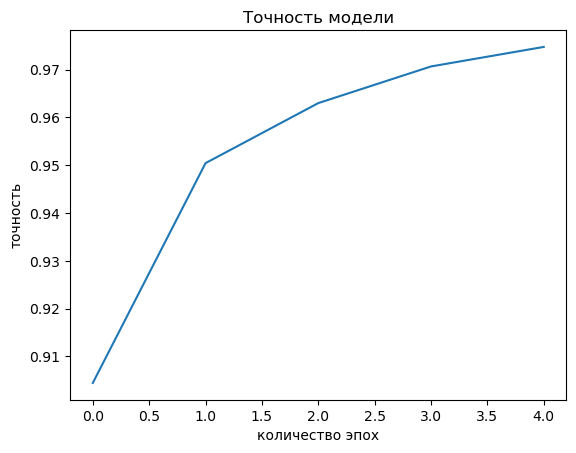

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

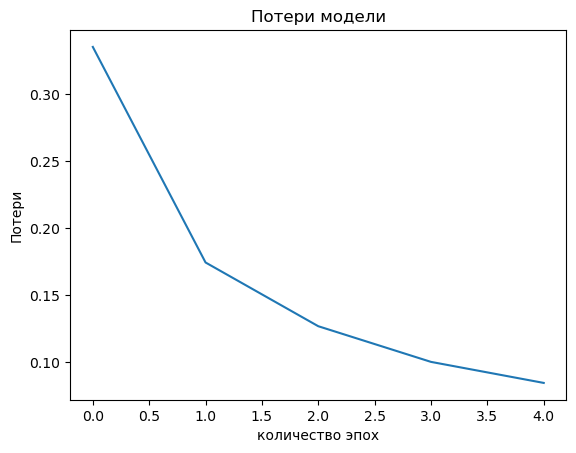

In [19]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [20]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 646us/step - loss: 0.0994 - accuracy: 0.9684


[0.09942076355218887, 0.9684000015258789]

In [21]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: 0.0938 - val_accuracy: 0.9703
Epoch 2/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 2s 901us/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.1015 - val_accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0981 - val_accuracy: 0.9705
Epoch 5/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0889 - val_accuracy: 0.9747
Wall time: 8.62 s


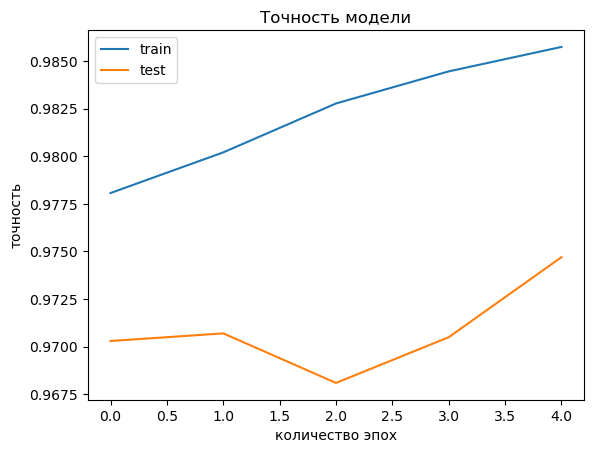

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


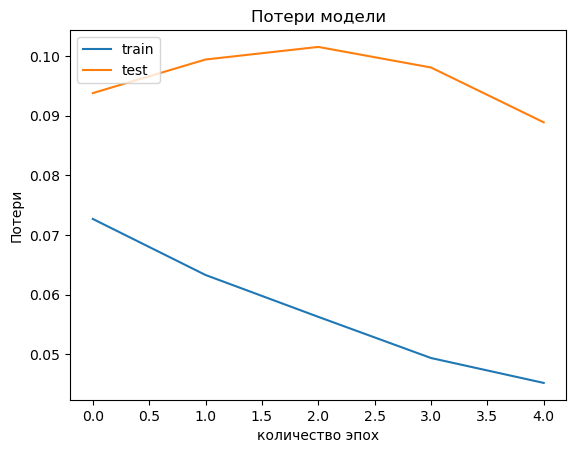

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()